# Input np,pd,sns

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# Sns define

In [29]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
import matplotlib.pylab as plt
%matplotlib inline 
#plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = False)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (12, 5))

# Input train data

In [30]:
zillow = pd.read_csv('train_2016_v2.csv',na_values='NA') 
zillow['transactiondate']=pd.to_datetime(zillow.transactiondate)
zillow.describe()

,parcelid,logerror,month,day,year
count,9.027500e+04,90275.000000,90275.000000,90275.000000,90275.0
mean,1.298466e+07,0.011457,5.849848,16.339507,2016.0
std,2.504510e+06,0.161079,2.812690,9.008589,0.0
min,1.071174e+07,-4.605000,1.000000,1.000000,2016.0
25%,1.155950e+07,-0.025300,4.000000,8.000000,2016.0
50%,1.254734e+07,0.006000,6.000000,16.000000,2016.0
75%,1.422755e+07,0.039200,8.000000,24.000000,2016.0
max,1.629608e+08,4.737000,12.000000,31.000000,2016.0


In [31]:
zillow.head()

,parcelid,logerror,transactiondate,month,day,year
0,11016594,0.0276,2016-01-01,1,1,2016
1,14366692,-0.1684,2016-01-01,1,1,2016
2,12098116,-0.0040,2016-01-01,1,1,2016
3,12643413,0.0218,2016-01-02,1,2,2016
4,14432541,-0.0050,2016-01-02,1,2,2016


## Basic analyz

In [32]:
zillow.shape

(90275, 6)

99% is  0.463882
1% is  -0.3425


C:\Users\wolu0\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


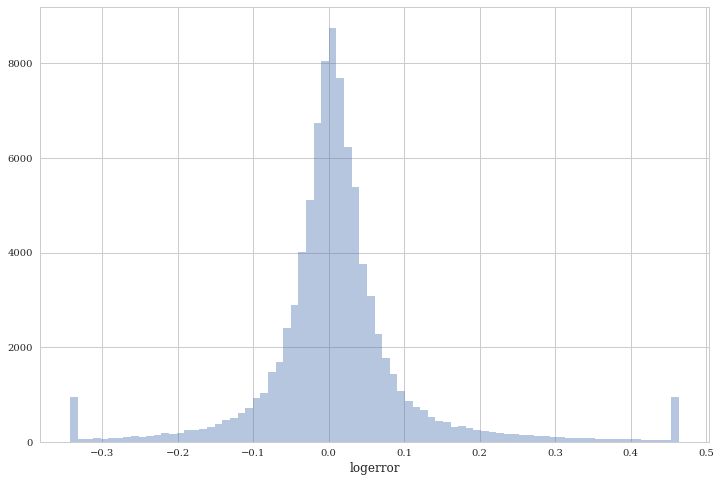

In [33]:
zillow_2=zillow
ulimit = np.percentile(zillow.logerror.values, 99)
llimit = np.percentile(zillow.logerror.values, 1)
print("99% is ",ulimit)
print("1% is ",llimit)
zillow_2['logerror'].loc[zillow_2['logerror']>ulimit] = ulimit
zillow_2['logerror'].loc[zillow_2['logerror']<llimit] = llimit
plt.figure(figsize=(12,8))
sns.distplot(zillow.logerror.values, bins=80, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

In [34]:
zillow.shape

(90275, 6)

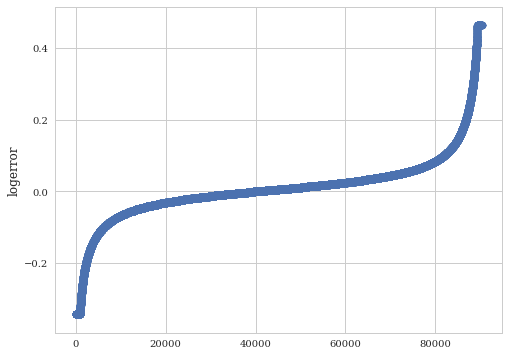

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(range(zillow.shape[0]), np.sort(zillow.logerror.values))
plt.ylabel('logerror', fontsize=12)
plt.show()

In [36]:
zillow.describe()

,parcelid,logerror,month,day,year
count,9.027500e+04,90275.000000,90275.000000,90275.000000,90275.0
mean,1.298466e+07,0.010404,5.849848,16.339507,2016.0
std,2.504510e+06,0.100614,2.812690,9.008589,0.0
min,1.071174e+07,-0.342500,1.000000,1.000000,2016.0
25%,1.155950e+07,-0.025300,4.000000,8.000000,2016.0
50%,1.254734e+07,0.006000,6.000000,16.000000,2016.0
75%,1.422755e+07,0.039200,8.000000,24.000000,2016.0
max,1.629608e+08,0.463882,12.000000,31.000000,2016.0


In [37]:
group_day = zillow[['logerror','transactiondate']].groupby('transactiondate').mean()
group_day.describe()

,logerror
count,352.000000
mean,0.010144
std,0.017834
min,-0.069900
25%,0.004251
50%,0.010757
75%,0.016435
max,0.188100


### Group by day

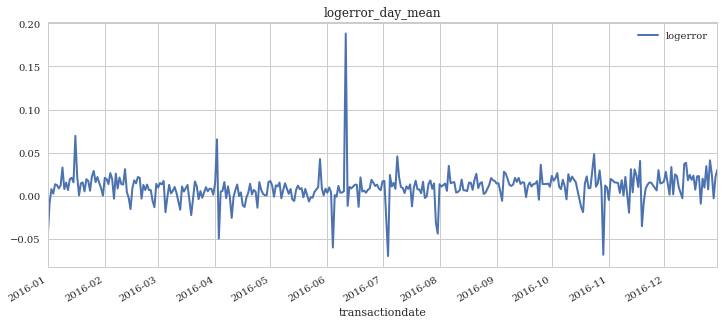

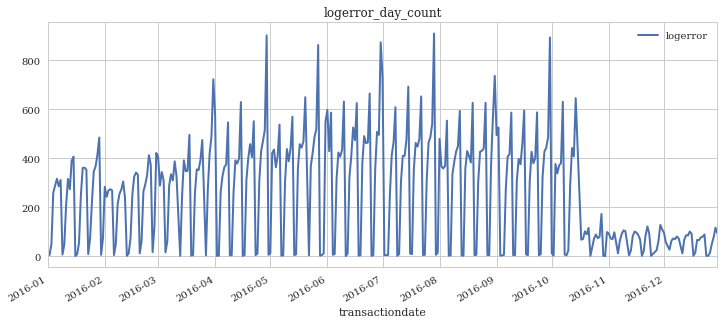

In [38]:
group_day.plot(title='logerror_day_mean')

#group_day.sort_values(by = 'logerror',axis = 0,ascending = True)
group_day_count = zillow[['logerror','transactiondate']].groupby('transactiondate').count()
group_day_count.plot(title='logerror_day_count')
plt.show()

### Group by month

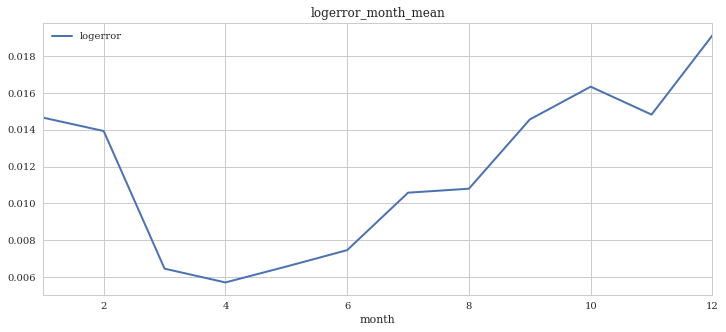

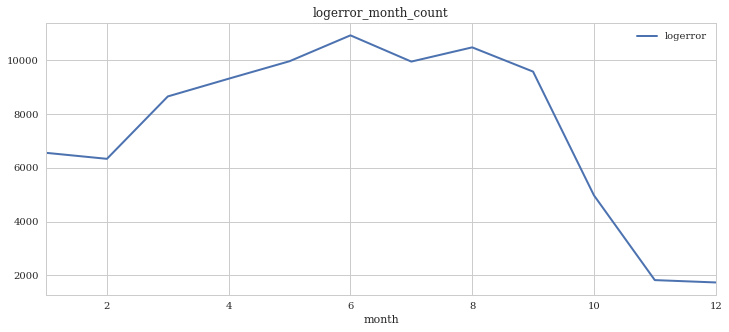

In [39]:
group_month = zillow[['logerror','month']].groupby('month').mean()
group_month.plot(title='logerror_month_mean')
group_month_count = zillow[['logerror','month']].groupby('month').count()
group_month_count.plot(title='logerror_month_count')
plt.show()

### Barplot
* the number of transactions in each month.

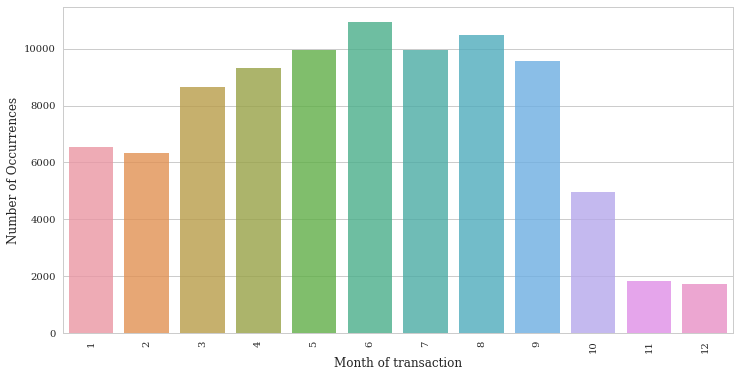

In [40]:
cnt_srs = zillow['month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

In [41]:
group_month.describe()

,logerror
count,12.000000
mean,0.011748
std,0.004458
min,0.005696
25%,0.007230
50%,0.012362
75%,0.014702
max,0.019132


## Pairplot regression

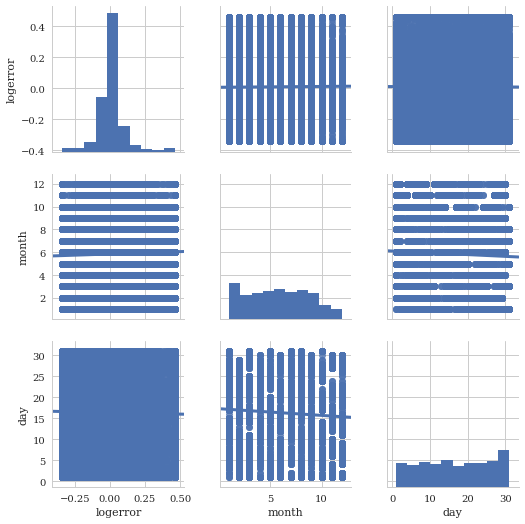

In [42]:
sns.pairplot(zillow[['logerror','transactiondate','month','day']],kind='reg')

# Correlation

## correlation with data, month

In [43]:
corrmat=zillow[['logerror','transactiondate','month','day']].corr()
corrmat

,logerror,month,day
logerror,1.000000,0.014822,-0.008250
month,0.014822,1.000000,-0.050052
day,-0.008250,-0.050052,1.000000


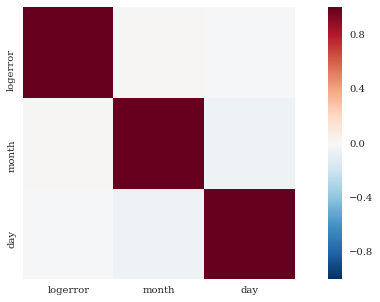

In [44]:
sns.heatmap(corrmat, vmax = 1, square = True)

# Heatmap of logerror by date

In [45]:
zillow_select=zillow.pivot_table(index='month',columns='day',values='logerror',aggfunc=np.mean)
zillow_select

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,-0.048267,-0.008150,0.007736,0.002435,0.013341,0.012368,0.008523,0.011984,0.032800,0.007729,...,0.019248,0.017300,0.005768,0.022369,0.028788,0.015856,0.021741,0.014863,0.008783,0.000119
2,0.020826,0.019403,0.013478,0.026255,0.019811,-0.003420,0.025682,0.008323,0.021187,0.013557,...,0.012624,0.006647,0.012986,0.006663,0.006569,-0.005947,-0.013310,0.013851,NaN,NaN
3,0.009535,0.014765,0.013277,0.017189,-0.019069,-0.001984,0.012716,0.002795,0.005642,0.010163,...,0.011113,-0.003931,0.005445,-0.002333,NaN,0.009950,0.005206,0.008308,0.007844,0.001283
4,0.015079,0.065400,-0.049700,0.004808,0.005650,0.015927,-0.002840,0.010922,-0.001680,-0.025650,...,0.006798,0.004740,-0.013845,0.015918,0.007198,0.002280,0.000644,0.000370,0.015967,NaN
5,0.017117,0.011884,-0.001108,0.012121,0.010817,0.015327,-0.002933,0.006600,0.014479,0.008187,...,-0.006625,-0.001615,-0.002233,0.004475,0.007278,0.009902,0.042533,0.008520,0.000567,0.008203
6,0.003466,0.009694,0.004102,-0.060050,0.000760,-0.001135,0.011359,0.003605,0.003778,0.005249,...,0.003522,0.006843,0.008295,0.018550,0.015160,0.011346,0.012862,0.008439,0.006464,NaN
7,0.016801,0.017200,NaN,-0.069900,0.024139,0.010649,0.015044,0.007949,0.045550,0.021300,...,0.002866,0.016240,-0.002550,-0.000689,0.013772,0.017842,0.007984,0.014376,-0.031567,-0.043886
8,0.013446,0.010626,0.012406,0.014217,0.005670,0.034700,0.014550,0.015376,0.015879,0.003774,...,0.008913,0.014353,0.015782,0.002096,0.003639,0.008160,0.012680,0.020479,0.018106,0.017233
9,0.014099,0.014605,0.005167,-0.005825,0.027833,0.025520,0.019346,0.012567,0.011404,0.013020,...,0.013980,0.017022,-0.004600,0.035967,0.013534,0.013574,0.013607,0.014204,0.010457,NaN


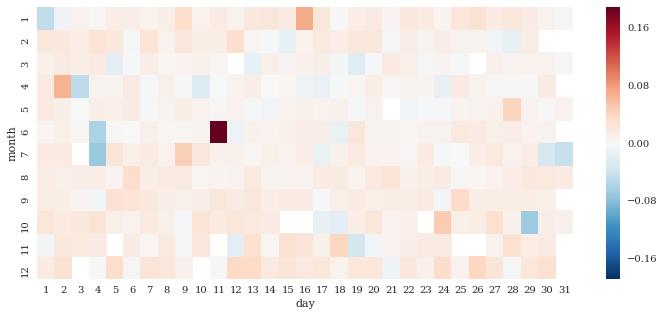

In [46]:
sns.heatmap(zillow_select,annot=False)

In [47]:
zillow.describe()

,parcelid,logerror,month,day,year
count,9.027500e+04,90275.000000,90275.000000,90275.000000,90275.0
mean,1.298466e+07,0.010404,5.849848,16.339507,2016.0
std,2.504510e+06,0.100614,2.812690,9.008589,0.0
min,1.071174e+07,-0.342500,1.000000,1.000000,2016.0
25%,1.155950e+07,-0.025300,4.000000,8.000000,2016.0
50%,1.254734e+07,0.006000,6.000000,16.000000,2016.0
75%,1.422755e+07,0.039200,8.000000,24.000000,2016.0
max,1.629608e+08,0.463882,12.000000,31.000000,2016.0


# Input train data

In [48]:
zillow = pd.read_csv('train_2016_v2.csv',na_values='NA') 
zillow['transactiondate']=pd.to_datetime(zillow.transactiondate)
zillow.describe()

,parcelid,logerror,month,day,year
count,9.027500e+04,90275.000000,90275.000000,90275.000000,90275.0
mean,1.298466e+07,0.011457,5.849848,16.339507,2016.0
std,2.504510e+06,0.161079,2.812690,9.008589,0.0
min,1.071174e+07,-4.605000,1.000000,1.000000,2016.0
25%,1.155950e+07,-0.025300,4.000000,8.000000,2016.0
50%,1.254734e+07,0.006000,6.000000,16.000000,2016.0
75%,1.422755e+07,0.039200,8.000000,24.000000,2016.0
max,1.629608e+08,4.737000,12.000000,31.000000,2016.0


# Find the most inaccurate predictions

In [49]:
zillow_select_higherthanone=zillow[np.abs(zillow.logerror)>0.5]
zillow_select_higherthanone=zillow_select_higherthanone.pivot_table(index='month',columns='day',values='logerror',aggfunc=np.mean)
zillow_select_higherthanone

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,0.223100,0.745300,0.719167,-0.164222,0.104520,NaN,NaN,...,0.499117,NaN,NaN,0.987967,0.343175,0.359487,0.407343,-0.068325,NaN,NaN
2,0.202110,0.050020,1.183875,0.625956,0.221900,NaN,NaN,0.073600,0.870800,0.584538,...,0.627900,-0.807950,-0.071275,0.394656,0.766570,NaN,NaN,-0.063400,NaN,NaN
3,0.450843,-0.395300,0.468200,0.632029,NaN,NaN,1.126700,0.330900,0.332575,0.398080,...,0.455180,0.152018,0.949157,-0.232150,NaN,NaN,0.788950,0.052658,0.379160,0.185914
4,0.046830,NaN,NaN,0.418350,1.001650,0.683290,-0.822520,0.670380,NaN,NaN,...,0.246929,NaN,NaN,0.634067,1.569740,0.183275,0.174680,0.090211,NaN,NaN
5,NaN,0.599429,-0.098583,0.245400,1.141500,0.080300,NaN,NaN,-1.082000,0.184900,...,NaN,0.827367,0.239411,0.810257,0.496050,0.344542,NaN,NaN,NaN,0.332469
6,0.123425,0.588792,0.685000,NaN,NaN,0.332014,0.659475,-0.683967,-1.316660,-0.450709,...,0.374567,0.712833,0.502413,NaN,NaN,0.042400,0.804533,-0.255720,0.248064,NaN
7,0.221133,NaN,NaN,NaN,1.152233,0.071075,0.029514,-0.200414,NaN,NaN,...,0.041362,NaN,NaN,0.893350,-0.507600,0.548560,0.999657,0.968767,NaN,-0.933900
8,0.474571,0.400870,0.419700,0.561200,-0.627100,NaN,NaN,0.456800,0.668500,-0.024375,...,0.172950,0.763025,0.094350,0.254917,-0.395267,NaN,NaN,0.069100,0.521900,0.871292
9,1.022425,-0.030218,NaN,NaN,NaN,0.512962,0.019500,0.485483,0.727575,NaN,...,0.452260,0.836000,NaN,NaN,0.688067,-0.281033,0.068942,0.818111,-0.278583,NaN


# Heatmap of the most inaccurate logerror by date

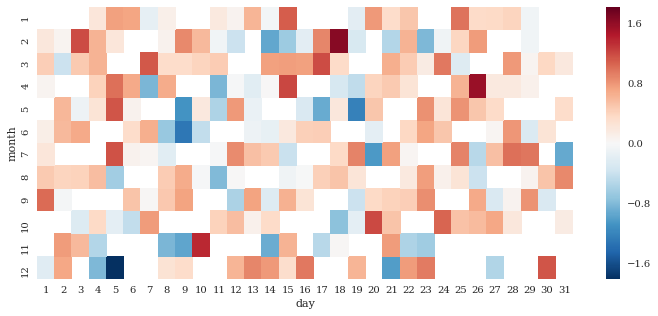

In [50]:
sns.heatmap(zillow_select_higherthanone,annot=False)

# Input zillow_join_clean

In [51]:
zillow_join = pd.read_csv('zillow_join_clean.csv',na_values='NA') 

C:\Users\wolu0\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [52]:
zillow_join

,Unnamed: 0,parcelid,logerror,transactiondate,month,day,year,airconditioningtypeid,architecturalstyletypeid,basementsqft,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,0,11016594,0.0276,2016-01-01,1,1,2016,1.0,NaN,NaN,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,1,14366692,-0.1684,2016-01-01,1,1,2016,NaN,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,2,12098116,-0.0040,2016-01-01,1,1,2016,1.0,NaN,NaN,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,3,12643413,0.0218,2016-01-02,1,2,2016,1.0,NaN,NaN,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,4,14432541,-0.0050,2016-01-02,1,2,2016,NaN,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
5,5,11509835,-0.2705,2016-01-02,1,2,2016,1.0,NaN,NaN,...,NaN,NaN,880650.0,2447951.0,2015.0,1567301.0,27126.57,NaN,NaN,6.037621e+13
6,6,12286022,0.0440,2016-01-02,1,2,2016,NaN,NaN,NaN,...,NaN,NaN,64549.0,111521.0,2015.0,46972.0,2304.97,NaN,NaN,6.037542e+13
7,7,17177301,0.1638,2016-01-02,1,2,2016,NaN,NaN,NaN,...,2.0,NaN,107000.0,306000.0,2015.0,199000.0,3745.50,NaN,NaN,6.111003e+13
8,8,14739064,-0.0030,2016-01-02,1,2,2016,NaN,NaN,NaN,...,NaN,NaN,66834.0,210064.0,2015.0,143230.0,2172.88,NaN,NaN,6.059042e+13
9,9,14677559,0.0843,2016-01-03,1,3,2016,NaN,NaN,NaN,...,1.0,NaN,109977.0,190960.0,2015.0,80983.0,1940.26,NaN,NaN,6.059063e+13


In [53]:
zillow_join.shape

(90275, 64)

# Analyze
* SEE the NUMBER of NULL

In [54]:
missing_df = zillow_join.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] /  zillow_join.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.8]

,column_name,missing_count,missing_ratio
8,architecturalstyletypeid,90014,0.997109
9,basementsqft,90232,0.999524
12,buildingclasstypeid,90259,0.999823
15,decktypeid,89617,0.992711
16,finishedfloor1squarefeet,83419,0.924054
19,finishedsquarefeet13,90242,0.999634
20,finishedsquarefeet15,86711,0.960521
21,finishedsquarefeet50,83419,0.924054
22,finishedsquarefeet6,89854,0.995336
24,fireplacecnt,80668,0.893581


* many have more than half nulls

# Check correlation

# Clean data (try to fulfill the null values with mean)

C:\Users\wolu0\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\wolu0\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


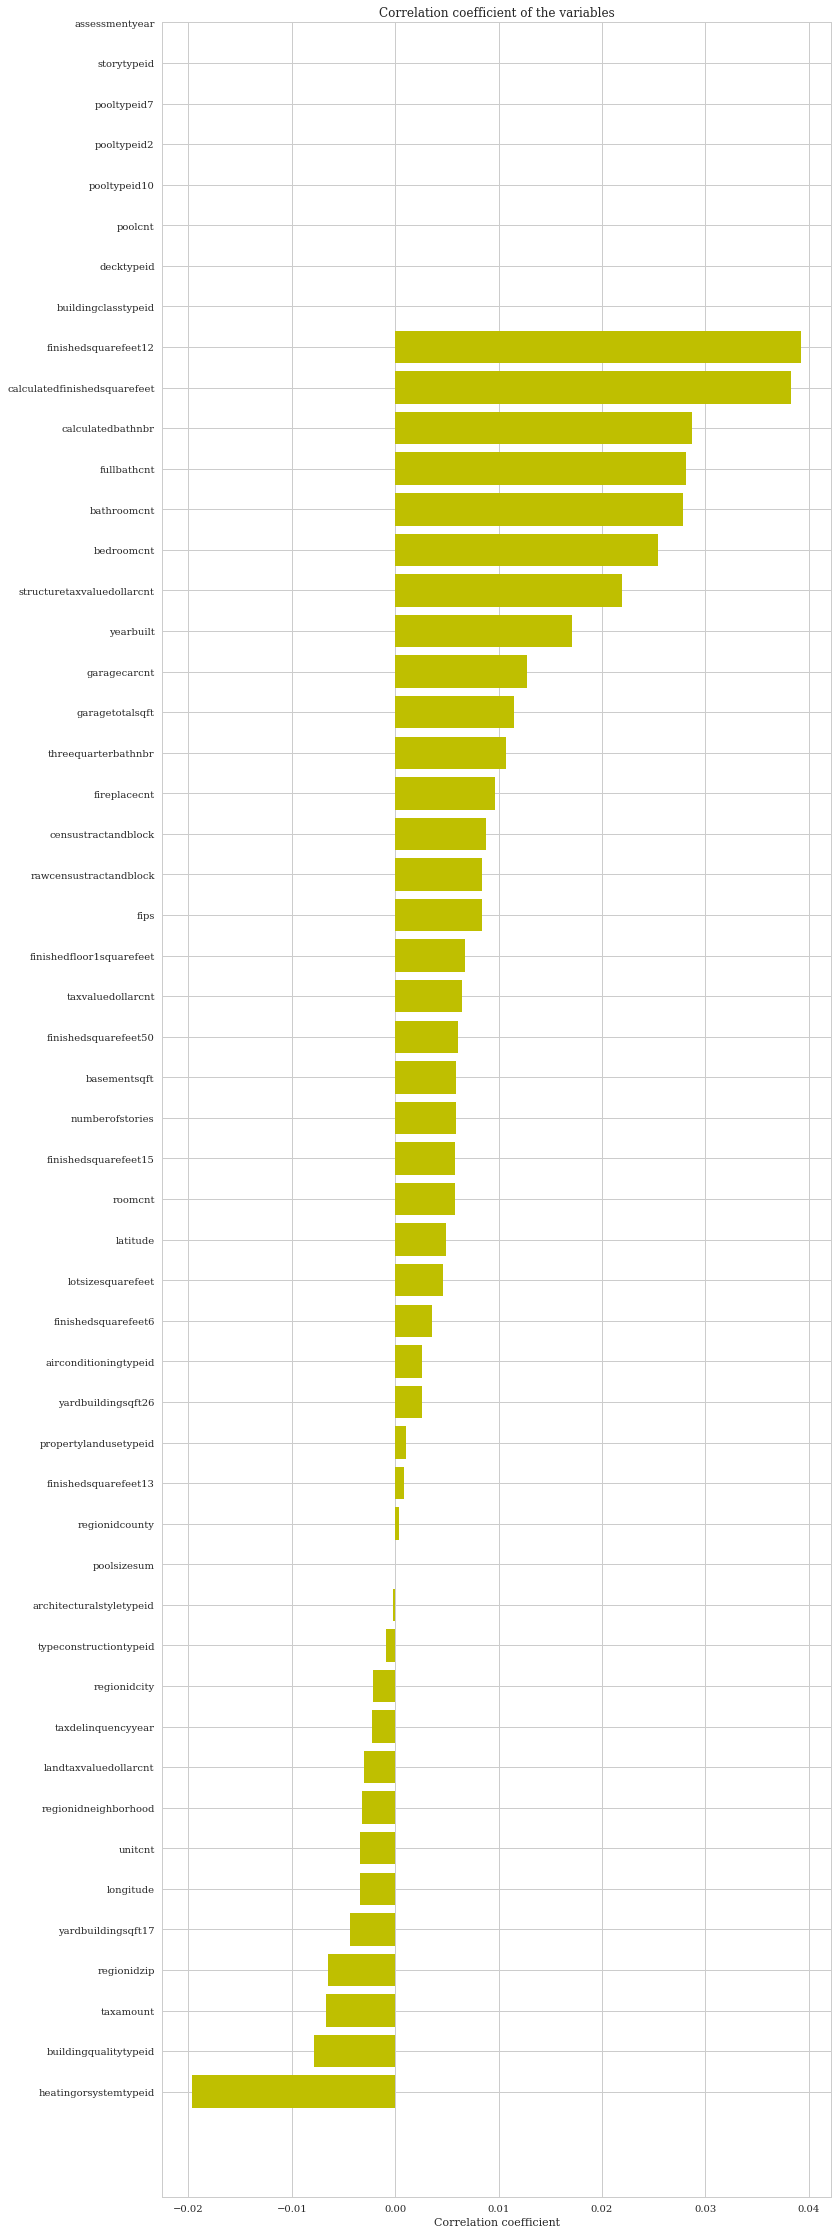

In [55]:
# impute the missing values with mean values to compute correlation coefficients #
mean_values = zillow_join.mean(axis=0)
zillow_join_fulfillmean = zillow_join.fillna(mean_values, inplace=True)

# look at the correlation coefficient of each of these variables #
x_cols = [col for col in zillow_join_fulfillmean.columns if col not in ['logerror'] if zillow_join_fulfillmean[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(zillow_join_fulfillmean[col].values, zillow_join_fulfillmean.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

In [56]:
corr_twoper = corr_df[np.abs(corr_df.corr_values)>0.02]
corr_twoper

,col_labels,corr_values
45,structuretaxvaluedollarcnt,0.021935
4,bedroomcnt,0.025467
3,bathroomcnt,0.027889
18,fullbathcnt,0.028169
7,calculatedbathnbr,0.028758
10,calculatedfinishedsquarefeet,0.038341
11,finishedsquarefeet12,0.039248


## Heatmap of strong variables

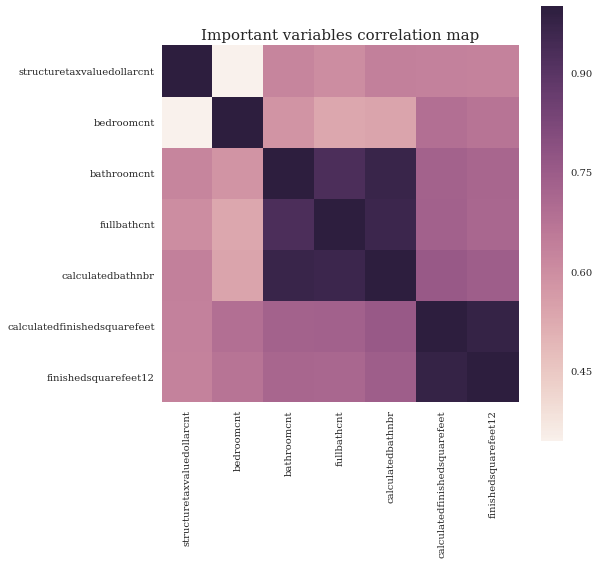

In [57]:
cols_to_use = corr_twoper.col_labels.tolist()

temp_df = zillow_join[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

                              logerror  structuretaxvaluedollarcnt  \
logerror                      1.000000                    0.021935   
structuretaxvaluedollarcnt    0.021935                    1.000000   
bedroomcnt                    0.025467                    0.301622   
bathroomcnt                   0.027889                    0.581032   
fullbathcnt                   0.028169                    0.585495   
calculatedbathnbr             0.028758                    0.604527   
calculatedfinishedsquarefeet  0.038341                    0.709404   
finishedsquarefeet12          0.039248                    0.727240   

                              bedroomcnt  bathroomcnt  fullbathcnt  \
logerror                        0.025467     0.027889     0.028169   
structuretaxvaluedollarcnt      0.301622     0.581032     0.585495   
bedroomcnt                      1.000000     0.646120     0.585935   
bathroomcnt                     0.646120     1.000000     0.950312   
fullbathcnt        

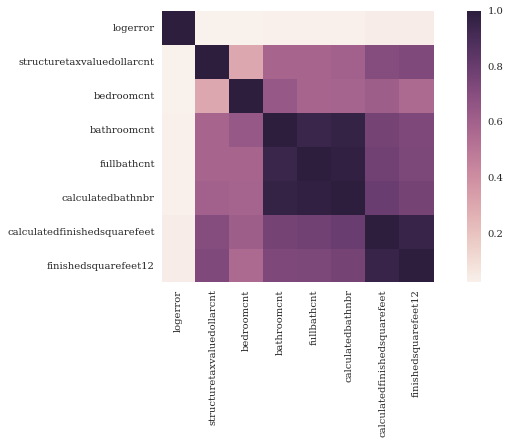

In [58]:
corrmat=zillow_join_fulfillmean[['logerror','structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt','calculatedbathnbr','calculatedfinishedsquarefeet','finishedsquarefeet12']].corr()
print(corrmat)
sns.heatmap(corrmat, vmax = 1, square = True)

# zillow_join_fulfillmean info

In [59]:
zillow_join_fulfillmean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 64 columns):
Unnamed: 0                      90275 non-null int64
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null object
month                           90275 non-null int64
day                             90275 non-null int64
year                            90275 non-null int64
airconditioningtypeid           90275 non-null float64
architecturalstyletypeid        90275 non-null float64
basementsqft                    90275 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             90275 non-null float64
buildingqualitytypeid           90275 non-null float64
calculatedbathnbr               90275 non-null float64
decktypeid                      90275 non-null float64
finishedfloor1squarefe

# convert the non-numerical data to factors

In [60]:
zillow_join_fulfillmean.hashottuborspa  = pd.factorize(zillow_join_fulfillmean.hashottuborspa )[0]
zillow_join_fulfillmean.propertycountylandusecode = pd.factorize(zillow_join_fulfillmean.propertycountylandusecode)[0]
zillow_join_fulfillmean.propertyzoningdesc  = pd.factorize(zillow_join_fulfillmean.propertyzoningdesc )[0]
zillow_join_fulfillmean.fireplaceflag  = pd.factorize(zillow_join_fulfillmean.fireplaceflag )[0]
zillow_join_fulfillmean.taxdelinquencyflag  = pd.factorize(zillow_join_fulfillmean.taxdelinquencyflag )[0]
zillow_join_fulfillmean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 64 columns):
Unnamed: 0                      90275 non-null int64
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null object
month                           90275 non-null int64
day                             90275 non-null int64
year                            90275 non-null int64
airconditioningtypeid           90275 non-null float64
architecturalstyletypeid        90275 non-null float64
basementsqft                    90275 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             90275 non-null float64
buildingqualitytypeid           90275 non-null float64
calculatedbathnbr               90275 non-null float64
decktypeid                      90275 non-null float64
finishedfloor1squarefe

# Regression Modeling

## Import regression library

In [61]:
#importing all the libraries and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus as pplus
import graphviz
from IPython.display import Image
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model,preprocessing,neighbors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error,r2_score
pd.set_option('display.notebook_repr_html', False)
%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\wolu0\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Select seven variables

In [62]:
zillow_data=zillow_join_fulfillmean[['structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt',
                                     'fullbathcnt','calculatedbathnbr','calculatedfinishedsquarefeet','finishedsquarefeet12']]
zillow_target=zillow_join_fulfillmean.logerror

In [63]:
train_data, test_data, train_target, test_target = train_test_split(zillow_data, zillow_target, train_size=0.5, random_state=23)

In [64]:
train_data.head()

       structuretaxvaluedollarcnt  bedroomcnt  bathroomcnt  fullbathcnt  \
71073                     68601.0         3.0          3.0          3.0   
81518                    280500.0         0.0          2.0          2.0   
84761                     94058.0         2.0          1.0          1.0   
31116                    258742.0         2.0          3.0          3.0   
81315                    203400.0         4.0          3.0          3.0   

       calculatedbathnbr  calculatedfinishedsquarefeet  finishedsquarefeet12  
71073                3.0                        1937.0                1937.0  
81518                2.0                        1980.0                1980.0  
84761                1.0                         806.0                 806.0  
31116                3.0                        1080.0                1080.0  
81315                3.0                        2250.0                2250.0  

## Select two

In [65]:
zillow_twodata=zillow_join_fulfillmean[['structuretaxvaluedollarcnt','bedroomcnt']]
zillow_twotarget=zillow_join_fulfillmean.logerror
train_tdata, test_tdata, train_ttarget, test_ttarget = train_test_split(zillow_twodata, zillow_twotarget, train_size=0.5, random_state=23)

# Select All

In [66]:
zillow_selectall_data=zillow_join_fulfillmean.drop('Unnamed: 0', axis=1).drop('parcelid', axis=1).drop('logerror', axis=1).drop('transactiondate', axis=1)

In [67]:
train_alldata, test_alldata, train_alltarget, test_alltarget = train_test_split(zillow_selectall_data, zillow_target, train_size=0.5, random_state=23)

# Linear Regression

* Varibles'structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt',
* 'fullbathcnt','calculatedbathnbr','calculatedfinishedsquarefeet','finishedsquarefeet12']]

In [68]:
trainreg = linear_model.LinearRegression()
trainreg.fit(train_data.as_matrix(),train_target)
print('Intercept:', trainreg.intercept_)
print('structuretaxvaluedollarcnt:', trainreg.coef_[0])
print('bedroomcnt:', trainreg.coef_[1])
print('bathroomcnt:', trainreg.coef_[2])
print('fullbathcnt:', trainreg.coef_[3])
print('calculatedbathnbr:', trainreg.coef_[4])
print('calculatedfinishedsquarefeet:', trainreg.coef_[5])
print('finishedsquarefeet12:', trainreg.coef_[6])
trainreg_predict=trainreg.fit(train_data.as_matrix(),train_target).predict(train_data.as_matrix())
MSE_trainreg=mean_squared_error(train_target, trainreg_predict) #lower scores are better
R2_trainreg=r2_score(train_target, trainreg_predict)
LinearRegression_train_score=trainreg.score(train_data.as_matrix(),train_target)
print("Mean Squared Error:", MSE_trainreg)
print("R-Squared:", R2_trainreg)
print("Training Score:", trainreg.score(train_data.as_matrix(),train_target))
      # 1 is the best score, lower scores are worse

Intercept: -0.00115517422151
structuretaxvaluedollarcnt: -1.34364465884e-08
bedroomcnt: 0.000167089378845
bathroomcnt: 0.000229016360491
fullbathcnt: 0.00141287922473
calculatedbathnbr: -0.00317445038125
calculatedfinishedsquarefeet: 3.33577939412e-06
finishedsquarefeet12: 7.66645234973e-06
Mean Squared Error: 0.0253768652325
R-Squared: 0.00192510302975
Training Score: 0.00192510302975


In [69]:
test_predict=trainreg.predict(test_data)
MSE_test=mean_squared_error(test_target.as_matrix(), test_predict) #lower scores are better
print("Test Mean Squared Error:", MSE_test)
LinearRegression_test_score=trainreg.score(test_data.as_matrix(), test_predict)
print("Testing Score:", trainreg.score(test_data.as_matrix(), test_predict)) # 1 is the best score, lower scores are worse

Test Mean Squared Error: 0.0264334989151
Testing Score: 1.0


In [70]:
test_predict[0:5]

array([ 0.00797201,  0.01675178,  0.0217163 ,  0.01022361,  0.0177231 ])

#  Regression Trees

In [71]:
regtree_rf = DecisionTreeRegressor(max_leaf_nodes=3, random_state=23)
regtree_rf.fit(train_data, train_target)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=3, min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=23, splitter='best')

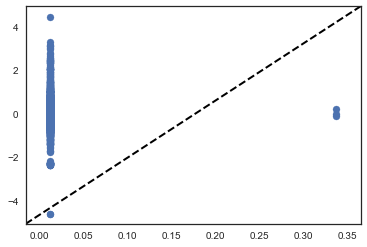

In [72]:
pred_rf = regtree_rf.predict(test_data)
plt.scatter(pred_rf, test_target)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)

In [73]:
mean_squared_error(test_target, pred_rf)

0.026475205920778618

# Plot Tree

In [74]:
#This function helps with drawing decision trees using the pydotplus and graphviz libraries
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

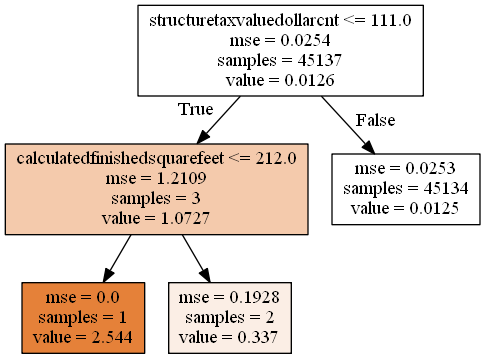

In [75]:
graph = print_tree(regtree_rf, features=['structuretaxvaluedollarcnt','bedroomcnt','bathroomcnt','fullbathcnt','calculatedbathnbr','calculatedfinishedsquarefeet','finishedsquarefeet12'])
Image(graph.create_png())

# Train all

# Linear Regression

In [76]:
trainreg = linear_model.LinearRegression()
trainreg.fit(train_alldata.as_matrix(),train_alltarget)

trainreg_predict=trainreg.fit(train_alldata.as_matrix(),train_alltarget).predict(train_alldata.as_matrix())
MSE_trainreg=mean_squared_error(train_alltarget, trainreg_predict) #lower scores are better
R2_trainreg=r2_score(train_alltarget, trainreg_predict)
LinearRegression_train_score=trainreg.score(train_alldata.as_matrix(),train_alltarget)
print("Mean Squared Error:", MSE_trainreg)
print("R-Squared:", R2_trainreg)
print("Training Score:", trainreg.score(train_alldata.as_matrix(),train_alltarget))
      # 1 is the best score, lower scores are worse

Mean Squared Error: 0.0252444115335
R-Squared: 0.00713452155969
Training Score: 0.00713452155969


In [77]:
test_predict=trainreg.predict(test_alldata)
MSE_test=mean_squared_error(test_alltarget.as_matrix(), test_predict) #lower scores are better
print("Test Mean Squared Error:", MSE_test)
LinearRegression_test_score=trainreg.score(test_alldata.as_matrix(), test_predict)
print("Testing Score:", trainreg.score(test_alldata.as_matrix(), test_predict)) # 1 is the best score, lower scores are worse

Test Mean Squared Error: 0.026372534859
Testing Score: 1.0


#  Regression Trees

In [78]:
#max_leaf_nodes=3,max_depth=3
regtree_rf = DecisionTreeRegressor(max_depth=7, random_state=23)
regtree_rf.fit(train_alldata, train_alltarget)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=23,
           splitter='best')

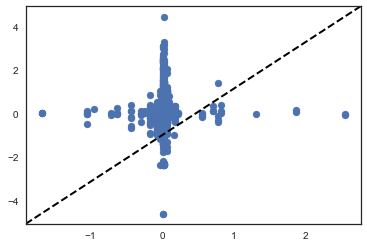

In [79]:
pred_rf = regtree_rf.predict(test_alldata)
plt.scatter(pred_rf, test_alltarget)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)

In [80]:
mean_squared_error(test_alltarget, pred_rf)

0.02737238251795044

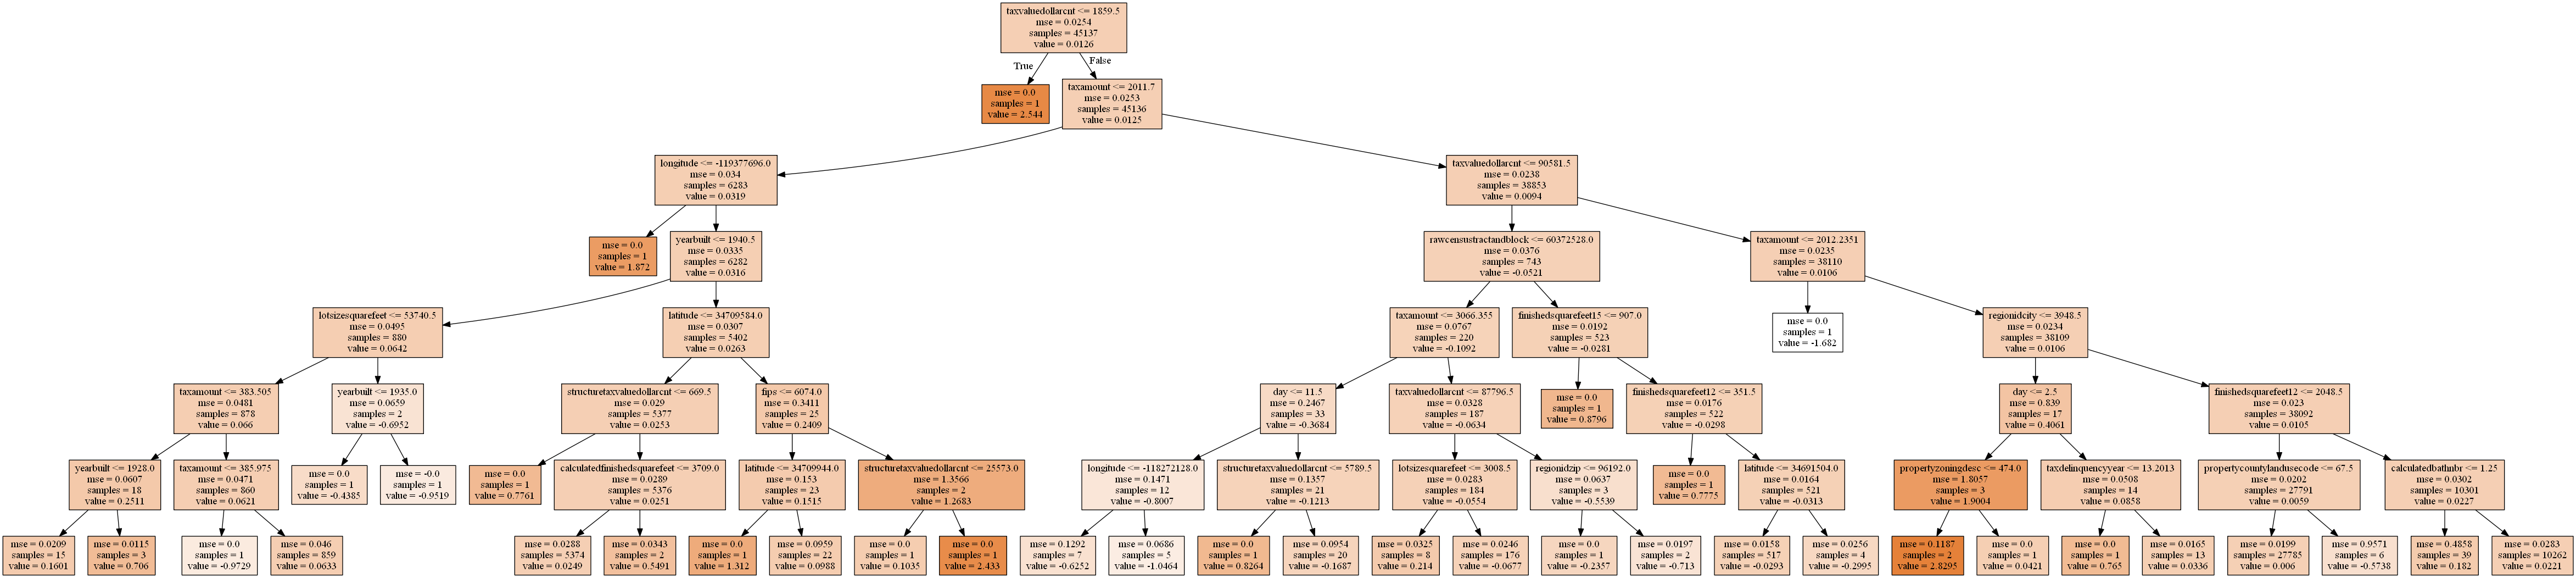

In [81]:
graph1 = print_tree(regtree_rf, features=zillow_selectall_data.columns)
Image(graph1.create_png())

### Bagging and Random Forest
* Bootstrap aggregation, or bagging, is a general-purpose procedure for reducing the variance of a statistical learning method. 
* Refer to chapter 8, page 316 of the ISL book for details.
* Averaging a set of observations reduces variance. Hence a natural way to reduce the variance and hence increase the prediction accuracy of a statistical learning method is to take many training sets from the population, build a separate prediction model using each training set, and average the resulting predictions.
* In the classification situation, there are a few possible approaches, but the simplest is as follows. For a given test observation, we can record the class predicted by each of the B trees, and take a majority vote: the overall prediction is the most commonly occurring majority vote class among the B predictions.
* Random Forest: As in bagging, we build a number of decision trees on bootstrapped training samples. But when building these decision trees, each time a split in a tree is considered, only a random sample of m predictors (specified) is chosen as split candidates from the full set of predictors.

In [82]:
#checking the number of features available in the dataset (which is 19)
zillow_selectall_data.shape

(90275, 60)

In [83]:
# Bagging: that is, we use all features in the dataset
#documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
regtree3 = RandomForestRegressor(max_features=19, random_state=23)
regtree3.fit(train_alldata, train_alltarget)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=19, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=23, verbose=0, warm_start=False)

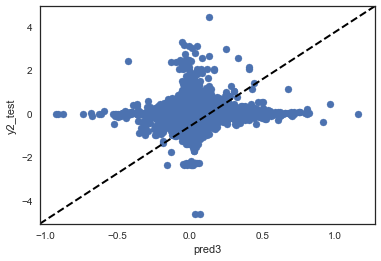

In [84]:
pred3 = regtree3.predict(test_alldata)
plt.scatter(pred3, test_alltarget, label='logerror')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred3')
plt.ylabel('y2_test')

In [85]:
mean_squared_error(test_alltarget, pred3)

0.029384693109098529

In [86]:
# Random forests: using all features
regtree4 = RandomForestRegressor(max_features=15, random_state=23)
regtree4.fit(train_alldata, train_alltarget)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=15, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=23, verbose=0, warm_start=False)

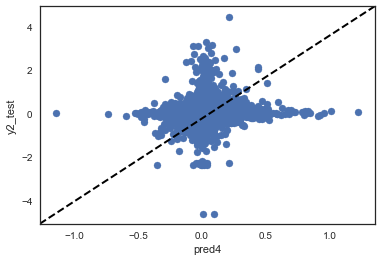

In [87]:
pred4 = regtree4.predict(test_alldata)
plt.scatter(pred4, test_alltarget)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred4')
plt.ylabel('y2_test')

In [88]:
mean_squared_error(test_alltarget, pred4)

0.029301184960588887

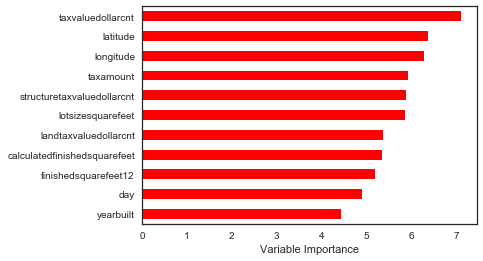

In [89]:
Importance = pd.DataFrame({'Importance':regtree4.feature_importances_*100}, index=zillow_selectall_data.columns)
Importance[Importance.Importance>4].sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [90]:
Importance.sort_values('Importance',ascending=False)

                              Importance
taxvaluedollarcnt               7.090436
latitude                        6.354646
longitude                       6.277886
taxamount                       5.911982
structuretaxvaluedollarcnt      5.868020
lotsizesquarefeet               5.854258
landtaxvaluedollarcnt           5.358790
calculatedfinishedsquarefeet    5.338581
finishedsquarefeet12            5.192801
day                             4.903437
yearbuilt                       4.417502
censustractandblock             3.446334
regionidzip                     3.389253
month                           3.296097
propertyzoningdesc              3.000652
rawcensustractandblock          2.983431
regionidcity                    2.841751
regionidneighborhood            2.326991
bedroomcnt                      1.748853
propertycountylandusecode       1.240495
bathroomcnt                     1.214628
fullbathcnt                     1.186394
finishedsquarefeet15            1.102388
calculatedbathnb

### Boosting
* A key diﬀerence between boosting and random forests: in boosting, the growth of a particular tree takes into account the other trees that have already been grown. This often results in using smaller trees, which aids interpretability of the model.

In [91]:
# documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
regtree5 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=23)
regtree5.fit(train_alldata, train_alltarget)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=23, subsample=1.0, verbose=0,
             warm_start=False)

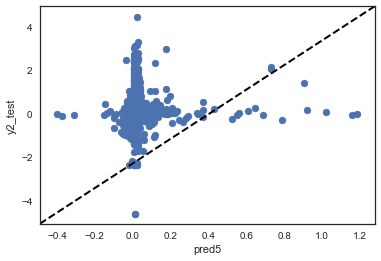

In [92]:
pred5 = regtree5.predict(test_alldata)
plt.scatter(pred5, test_alltarget)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred5')
plt.ylabel('y2_test')

In [93]:
mean_squared_error(test_alltarget, pred5)

0.026331765510255133

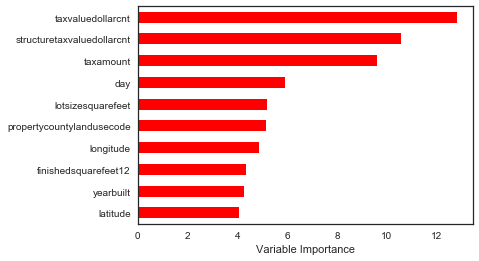

In [94]:
feature_importance =pd.DataFrame({'Importance':regtree5.feature_importances_*100}, index=zillow_selectall_data.columns)
feature_importance[feature_importance.Importance>4].sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [95]:
feature_importance.sort_values('Importance',ascending=False)

                              Importance
taxvaluedollarcnt              12.796567
structuretaxvaluedollarcnt     10.568848
taxamount                       9.595112
day                             5.911892
lotsizesquarefeet               5.169971
propertycountylandusecode       5.145791
longitude                       4.844539
finishedsquarefeet12            4.332350
yearbuilt                       4.255847
latitude                        4.061689
regionidzip                     3.895650
calculatedfinishedsquarefeet    3.458320
regionidcity                    3.310331
finishedsquarefeet6             2.827486
regionidneighborhood            1.940227
bathroomcnt                     1.812585
finishedsquarefeet15            1.720644
month                           1.720466
rawcensustractandblock          1.447937
propertyzoningdesc              1.321668
heatingorsystemtypeid           1.003133
calculatedbathnbr               0.983964
fullbathcnt                     0.918404
unitcnt         

# Subset Selection

* This involves identifying a subset of available predictors that are related to the response variable. We then ﬁt a model using the reduced set of variables.
* To identify a best model, we define a metric such as the smallest RSS, and pick among the models using prediction error (MSE), or other metrics such as adjusted R-squared, AIC, or BIC. 
* Instead of searching all predictors at once, we could utilize stepwise selection, which is computationally more efficient and yields a smaller set of useful predictors. We can begin with the null model and keep adding more predictors (forward selection) or beging with a full model and keep dropping predictors (backward selection). Hybrid approaches are also possible.


In [96]:
#let us define the functions for performing repeated selections
import math
import time
import random
import itertools

#a function for deriving residual sum of squares for a given model
def getRSS(y, X, feature_list):
    model = sm.OLS(y, X[list(feature_list)]).fit()
    RSS = ((model.predict(X[list(feature_list)]) - y) ** 2).sum()
    return {'Model':model, "RSS":RSS}

#identify the model with the minimum RSS
def bestModel(y, X, K):
    results = []
    for c in itertools.combinations(X.columns, K):
        results.append(getRSS(y, X, c))     
    model_all =  pd.DataFrame(results)
    best_model = model_all.loc[model_all["RSS"].argmin()]
    return best_model

In [97]:
max_feature = 2
models = pd.DataFrame(columns=["RSS", "Model"])
for i in range(1,(max_feature+1)):  
    models.loc[i] = bestModel(train_alltarget, train_alldata, i)

In [98]:
models

           RSS                                              Model
1  1145.672849  <statsmodels.regression.linear_model.Regressio...
2  1143.495640  <statsmodels.regression.linear_model.Regressio...

In [99]:
#print the best 2-predictor model
print (models.loc[2, 'Model'].summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     222.8
Date:                Sun, 29 Oct 2017   Prob (F-statistic):           4.93e-97
Time:                        15:10:17   Log-Likelihood:                 18906.
No. Observations:               45137   AIC:                        -3.781e+04
Df Residuals:                   45135   BIC:                        -3.779e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
finishedsquarefeet12  1.176e-05 

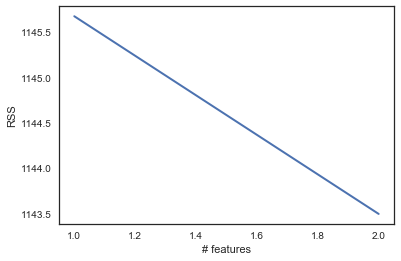

In [100]:
#visualize the derived RSS for models
plt.figure()
plt.plot(models["RSS"])
plt.xlabel('# features')
plt.ylabel('RSS')
plt.show()

In [101]:
# we can derive the adjusted-rsquared metric to see if more features are helpful
rsquared_adj = models.apply(lambda row: row[1].rsquared_adj, axis=1)

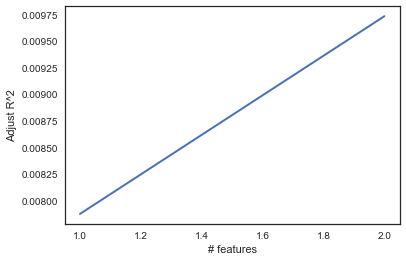

In [102]:
#visualize the adjusted-rsquared metric for the models
plt.figure()
plt.plot(rsquared_adj)
plt.xlabel('# features')
plt.ylabel('Adjust R^2')
plt.show()

#let us try with 3 features.
max_feature = 3
models2 = pd.DataFrame(columns=["RSS", "Model"])
for i in range(1,(max_feature+1)):  
    models2.loc[i] = bestModel(train_alltarget, train_alldata, i)

models2

print (models2.loc[5, 'Model'].summary())

#visualize the derived RSS for the 5-predictor models
plt.figure()
plt.plot(models2["RSS"])
plt.xlabel('# features')
plt.ylabel('RSS')
plt.show()

rsquared_adj2 = models2.apply(lambda row: row[1].rsquared_adj, axis=1)

#visualize the adjusted-rsquared metric for the 5-predictor models
plt.figure()
plt.plot(rsquared_adj2)
plt.xlabel('# features')
plt.ylabel('Adjust R^2')
plt.show()

# Forward and backward (step-wise) Selection

In [103]:
#let us define the functions to perform the selections
def forward_select(y, X, feature_list):
    remaining_predictors = [p for p in X.columns if p not in feature_list]
    results = []
    for p in remaining_predictors:
        results.append(getRSS(y, X, feature_list+[p]))
    models = pd.DataFrame(results)
    best_model = models.loc[models['RSS'].argmin()]
    return best_model

def backward_select(y, X, feature_list):
    results = []
    for combo in itertools.combinations(feature_list, len(feature_list)-1):
        results.append(getRSS(y, X, combo))
    models = pd.DataFrame(results)
    best_model = models.loc[models['RSS'].argmin()]
    return best_model

In [120]:
# let's do the forward selection which starts from the null model
models3 = pd.DataFrame(columns=["RSS", "Model"])
feature_list = [] #begin with null model.
for i in range(1,len(train_alldata.columns)+1):
    models3.loc[i] = forward_select(train_alltarget, train_alldata, feature_list)
    feature_list = models3.loc[i]["Model"].model.exog_names

In [122]:
# we can compare the results of best subset selection and the forward selection
print('Variables selected using best subset selection:')
print (models.loc[max_feature, 'Model'].params)
print('\n---------------------------------------------')
print('Variables selected using forward selection:')
print (models3.loc[max_feature, 'Model'].params)

Variables selected using best subset selection:
finishedsquarefeet12    0.000012
taxamount              -0.000001
dtype: float64

---------------------------------------------
Variables selected using forward selection:
finishedsquarefeet12    0.000012
taxamount              -0.000001
dtype: float64


In [124]:
# Let's do the backward selection, which starts from the full model
models4 = pd.DataFrame(columns=["RSS", "Model"], index = range(1,len(train_alldata.columns)))
feature_list = train_alldata.columns #begin with the full model

while(len(feature_list) > 1):
    models4.loc[len(feature_list)-1] = backward_select(train_alltarget, train_alldata, feature_list)
    feature_list = models4.loc[len(feature_list)-1]["Model"].model.exog_names

print (models4.loc[max_feature, "Model"].params)

calculatedfinishedsquarefeet    0.000011
taxamount                      -0.000001
dtype: float64


# Validation Set and Cross-Validation

* We know this already: validate a model by (1) splitting the dataset into train and test, (2) fit the model on the training set, and predict the responses in the test set using the training_fitted model, and (3) repeat the steps in conjunction with the above subset-selection approaches to pick the most-desired model (i.e., a model with the least MSE). 
* If you split the dataset into "k" groups/folds, you are performing the "k-fold" cross-validation procedure. 

In [104]:

np.random.seed(seed = 23) 

train_index = np.random.choice([True, False], size = len(train_alldata), replace = True, p = [0.5, 0.5])
test_index = np.invert(train_index) #True would become False and False would become True.
X_trainVS= train_alldata[train_index]
y_trainVS = train_alltarget[train_index]
X_testVS = train_alldata[test_index]
y_testVS = train_alltarget[test_index]

In [105]:
#adjust the functions to perform cross-validation

def getRSS_validation(y_tr, X_tr, y_tt, X_tt,  feature_list):
    model = sm.OLS(y_tr, X_tr[list(feature_list)]).fit()
    RSS = ((model.predict(X_tt[list(feature_list)]) - y_tt) ** 2).sum()
    return {'Model':model, 'RSS':RSS}

def bestModel_validation(y_tr, X_tr, y_tt, X_tt, K):
    results = []
    for c in itertools.combinations(X_tr.columns, K):
        results.append(getRSS_validation(y_tr, X_tr, y_tt, X_tt, c))     
    model_all =  pd.DataFrame(results)
    best_model = model_all.loc[model_all['RSS'].argmin()] ## this could be modified to have the top several models
    return best_model


def forward_select_validation(y_tr, X_tr, y_tt, X_tt,  feature_list):
    remaining_predictors = [p for p in X_tr.columns if p not in feature_list]
    results = []
    for p in remaining_predictors:
        results.append(getRSS_validation(y_tr, X_tr, y_tt, X_tt, feature_list+[p]))
    models = pd.DataFrame(results)
    best_model = models.loc[models['RSS'].argmin()]
    return best_model

def backward_select_validation(y_tr, X_tr, y_tt, X_tt,  feature_list):
    results = []
    for combo in itertools.combinations(feature_list, len(feature_list)-1):
        results.append(getRSS_validation(y_tr, X_tr, y_tt, X_tt,  combo))
    models = pd.DataFrame(results)
    best_model = models.loc[models['RSS'].argmin()]
    return best_model

In [106]:
max_feature = 2 #just to save us computation time; try with the maximum variables at your leisure

## change the function depending on what selection approach you need. Let's begin with best

models_validation= pd.DataFrame(columns=["RSS", "Model"])
for i in range(1,(max_feature+1)):  
    models_validation.loc[i] = bestModel_validation(y_trainVS, X_trainVS, y_testVS, X_testVS, i)

In [107]:
print('Best 2-predictor model using best subset selection & validation approach:')
print (models_validation.loc[max_feature, 'Model'].params)

Best 2-predictor model using best subset selection & validation approach:
finishedsquarefeet12    1.140823e-05
taxamount              -9.465980e-07
dtype: float64


In [108]:
# forward selection, which starts from the null model
models5_forwardVS = pd.DataFrame(columns=["RSS", "Model"])
feature_list = []
for i in range(1,len(train_alldata.columns)+1):
    models5_forwardVS.loc[i] = forward_select_validation(y_trainVS, X_trainVS, y_testVS, X_testVS, feature_list)
    feature_list = models5_forwardVS.loc[i]["Model"].model.exog_names

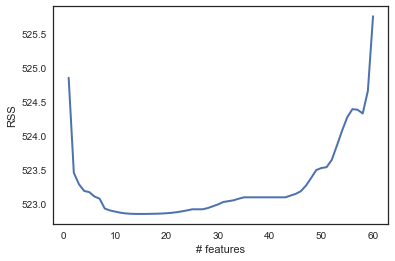

In [109]:
#what is the optimal number of features as per the forward selection model?
plt.figure()
plt.plot(models5_forwardVS["RSS"])
plt.xlabel('# features')
plt.ylabel('RSS')
plt.show()

In [110]:
print('Best 2-predictor model using forward subset selection & validation approach:')
print (models5_forwardVS.loc[2, 'Model'].params)

Best 2-predictor model using forward subset selection & validation approach:
finishedsquarefeet12    1.140823e-05
taxamount              -9.465980e-07
dtype: float64


In [113]:
# backward selection, which starts from the full model
models6_backwardVS = pd.DataFrame(columns=["RSS", "Model"], index = range(1,len(train_alldata.columns)))
feature_list = train_alldata.columns #begin with the full model

while(len(feature_list) > 1):
    models6_backwardVS.loc[len(feature_list)-1] = backward_select_validation(y_trainVS, X_trainVS, y_testVS, X_testVS, feature_list)
    feature_list = models6_backwardVS.loc[len(feature_list)-1]["Model"].model.exog_names

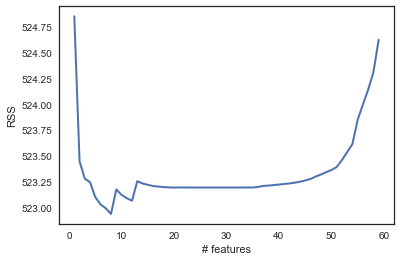

In [114]:
plt.figure()
plt.plot(models6_backwardVS["RSS"])
plt.xlabel('# features')
plt.ylabel('RSS')
plt.show()

In [115]:
print('Best 2-predictor model using backward selection & validation approach:')
print (models6_backwardVS.loc[2, 'Model'].params)

Best 2-predictor model using backward selection & validation approach:
finishedsquarefeet12    1.140823e-05
taxamount              -9.465980e-07
dtype: float64


### K-fold cross validation
* more computationally intensive as we split the dataset into multiple folds

In [116]:
#let us try for 5 folds
k = 5
np.random.seed(seed = 23) #once again, hail to MJ!
train_index = np.random.choice(k, size = len(train_alldata), replace = True)
cv_errors = pd.DataFrame(columns=range(1,k+1), index=range(1,len(train_alldata.columns) + 1))

In [117]:
models_cv = pd.DataFrame(columns=["RSS", "Model"])
for j in range(1,k+1):
    feature_list = []
    for i in range(1,len(train_alldata.columns)+1):
        models_cv.loc[i] = forward_select_validation(train_alltarget[train_index!= (j-1)], train_alldata[train_index != (j-1)], 
                                                     train_alltarget[train_index == (j-1)],train_alldata[train_index == (j-1)], 
                                                     feature_list)
        
        cv_errors[j][i] = models_cv.loc[i]["RSS"]
        feature_list = models_cv.loc[i]["Model"].model.exog_names

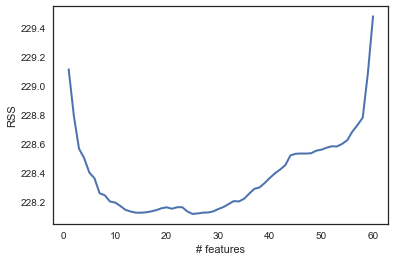

In [118]:
cv_errors_mean = cv_errors.mean(axis = 1)
plt.figure()
plt.plot(cv_errors_mean)
plt.xlabel('# features')
plt.ylabel('RSS')
plt.show()

In [119]:
print(models_cv.loc[10, "Model"].summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     41.88
Date:                Sun, 29 Oct 2017   Prob (F-statistic):           3.04e-83
Time:                        15:23:50   Log-Likelihood:                 14906.
No. Observations:               36091   AIC:                        -2.979e+04
Df Residuals:                   36081   BIC:                        -2.971e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
finishedsquarefe